In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from SedCas import SedCas

%matplotlib inline

## Model run

In [2]:
"""
Created on Thu Feb  3 16:56:57 2022

@author: hirschbe
"""

# from SedCas import SedCas
# 
# model = SedCas()
# model.load_climate()
# model.load_params()
# model.run_hydro()
# model.run_sediment()
# model.save_output()
# model.plot_sedyield_monthly()

# Qstl = potential sediment catchment output [mm], i.e. transport-limited case

'\nCreated on Thu Feb  3 16:56:57 2022\n\n@author: hirschbe\n'

In [3]:
from SedCas import SedCas

model = SedCas()
model.load_climate()
model.load_params()

In [4]:
model.run_hydro()
# model.run_sediment()
# model.save_output()

In [5]:
%%time
model.run_sediment()

running sediment module...


100%|█████████████████████████████████████████| 100/100 [01:44<00:00,  1.05s/it]


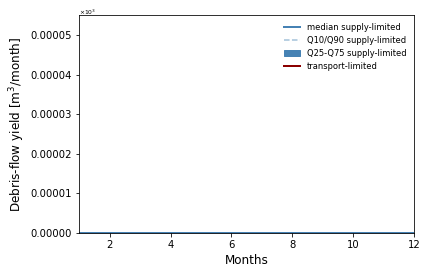

In [6]:
model.save_output()
model.plot_sedyield_monthly()

### look at the output

In [7]:
hydroout = pd.read_csv('Hydro.out')
sedimentout = pd.read_csv('Sediment.out')

climate = pd.read_csv('climate.met', sep = '\t')

In [12]:
# sedimentout

In [13]:
# sedimentout.Qstl.plot()
# hydroout.tail()

In [25]:
# sedimentout.Qstl.plot()

### total amount of sediments washed out: 

In [8]:
total = sedimentout.sum()
print('total amount of sediments washed (under TL situation) [mm]:', total.Qstl)

total amount of sediments washed (under TL situation) [mm]: 530.0659211498565


In [9]:
## unite here: 
sediments = sedimentout

# get area from parameters files: 
area = 4.83
cf = (area*10**6) * 10**-3   # km2 to m2 and mm to m

# qstl_area = pd.DataFrame(data = sedimentout.Qstl*cf, index=pd.to_datetime(sedimentout.index))
qstl_area = pd.DataFrame()
qstl_area['Qstl'] = sedimentout.Qstl*cf # -> m3 
qstl_area.index = sedimentout.D

# qstl_area.set_index('D')
qstl_area.index = pd.to_datetime(qstl_area.index)

sym = qstl_area.resample('m').sum()            # sediment yeld month 
symm = sym.groupby(by=sym.index.month).mean()  # sediment yeld month mean 



In [14]:
qstl_area.rename(columns={'Qstl': 'Qstl_19easterntsh'})
# qstl_area.to_csv('13_19easterntsh_Qstl_m3.csv') 
# 19_Eastern_Tien_Shan

In [2]:
os.chdir('19_Eastern_Tien_Shan')

FileNotFoundError: [Errno 2] No such file or directory: '19_Eastern_Tien_Shan'